# CNN for Mel-Spectrogram (30 secs)

## 1 - All the imports

In [6]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

## 2 - Put the data within the model

In [7]:
# # Import a single image and save it to be read by the model

# image = os.path.join('blues.00000.png')

# # Load the image
# image = tf.io.read_file(image)

# # Convert to a numpy array
# image = tf.image.decode_png(image, channels=1)
# image = tf.image.convert_image_dtype(image, tf.float32)
# image = tf.image.resize(image, [256, 256])
# image = image.numpy()

# 3 - Create the model

In [8]:
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Normalization

model = models.Sequential([    
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    Normalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    Normalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    Normalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    Normalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    Dropout(0.5),
    
    Dense(128, activation='relu'), 
    Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_4 (Normalization) │ (None, 254, 254, 32)   │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_5 (Normalization) │ (None, 125, 125, 64)   │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_6 (Normalization) │ (None, 60, 60, 128)    │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_7 (Normalization) │ (None, 28, 28, 256)    │           513 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,244,942 (100.12 MB)

 Trainable params: 26,243,978 (100.11 MB)

 Non-trainable params: 964 (3.78 KB)

# 4 - Load the images

In [10]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Augmentation function
def augment_image(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    return image

# Define the genres and file paths
GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
FILE_PATH = os.path.join('Data', 'mel_spectrograms', 'mel_spectrogram_512')
X = []
y = []

GENRE_TO_INDEX = {genre: index for index, genre in enumerate(GENRES)}

# Loop through the genres and load the images with augmentation
for genre in GENRES:
    genre_dir = os.path.join(FILE_PATH, genre)
    print(f"Going through {genre}")
    for file in os.listdir(genre_dir):
        image = tf.io.read_file(os.path.join(genre_dir, file))
        image = tf.image.decode_png(image, channels=1)
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = tf.image.resize(image, [256, 256])  # Resize to 256x256
        image = augment_image(image)  # Apply augmentation
        image = image.numpy()  # Convert to numpy array
        X.append(image)
        y.append(GENRE_TO_INDEX[genre])

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Going through blues
Going through classical
Going through country
Going through disco
Going through hiphop
Going through jazz
Going through metal
Going through pop
Going through reggae
Going through rock


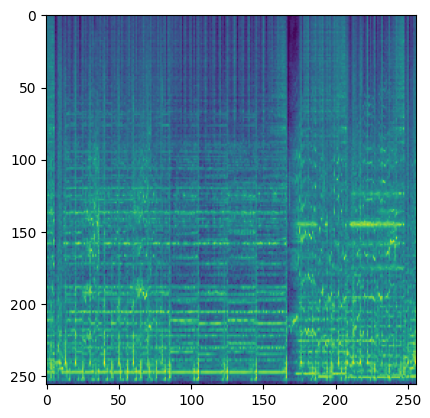

In [11]:
# Show image as a sanity check
import matplotlib.pyplot as plt
plt.imshow(X_train[22].reshape(256, 256))
plt.show()

## 5 - Compile the model

In [12]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

## 6 - Fit the model

In [13]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32, callbacks=[reduce_lr])

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 679ms/step - accuracy: 0.1042 - loss: 2.3061 - val_accuracy: 0.1050 - val_loss: 2.3029 - learning_rate: 1.0000e-04
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 667ms/step - accuracy: 0.1067 - loss: 2.2966 - val_accuracy: 0.1150 - val_loss: 2.2946 - learning_rate: 1.0000e-04
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 647ms/step - accuracy: 0.1339 - loss: 2.2818 - val_accuracy: 0.0750 - val_loss: 2.2968 - learning_rate: 1.0000e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 641ms/step - accuracy: 0.1586 - loss: 2.2315 - val_accuracy: 0.1700 - val_loss: 2.2357 - learning_rate: 1.0000e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.1689 - loss: 2.1927 - val_accuracy: 0.2100 - val_loss: 2.1879 - learning_rate: 1.0000e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.2003 - loss: 2.1494 - val_accuracy: 0.1800 - val_loss: 2.1994 - learning_rate: 1.0000e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.

## 7 - Check the accuracy

In [14]:
evaluation = model.evaluate(X_test, y_test)
print(f"Test accuracy: {evaluation[1]:.3f}")

# Save the model
model.save('mel_spectrogram512.h5')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.3879 - loss: 1.6042


Test accuracy: 0.400


# 8 - Apply the confusion matrix after the model

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


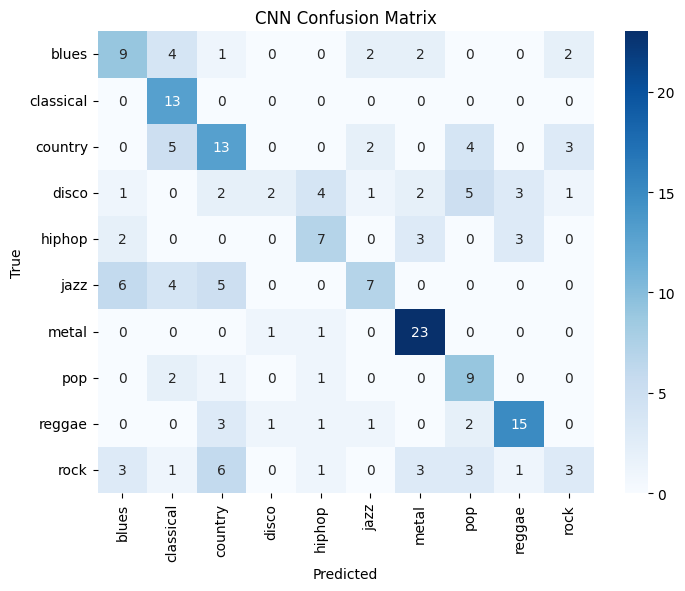

In [12]:
import seaborn as sns
# from sklearn.metrics import confusion
import numpy as NP
from sklearn.metrics import confusion_matrix

cnn_preds = np.argmax(model.predict(X_test), axis=1)
cnn_cm = confusion_matrix(y_test, cnn_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=GENRES, yticklabels=GENRES)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## 9 - Limited Genres Easy (metal and classical)

In [13]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Augmentation function
def augment_image(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    return image

# Define the genres and file paths
GENRES = ['classical', 'metal']
FILE_PATH = os.path.join('Data', 'mel_spectrograms', 'mel_spectrogram_128')
X = []
y = []

GENRE_TO_INDEX = {genre: index for index, genre in enumerate(GENRES)}

# Loop through the genres and load the images with augmentation
for genre in GENRES:
    genre_dir = os.path.join(FILE_PATH, genre)
    print(f"Going through {genre}")
    for file in os.listdir(genre_dir):
        image = tf.io.read_file(os.path.join(genre_dir, file))
        image = tf.image.decode_png(image, channels=1)
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = tf.image.resize(image, [256, 256])  # Resize to 256x256
        image = augment_image(image)  # Apply augmentation
        image = image.numpy()  # Convert to numpy array
        X.append(image)
        y.append(GENRE_TO_INDEX[genre])

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Normalization

model = models.Sequential([    
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    Normalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    Normalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    Normalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    Normalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    Dropout(0.5),
    
    Dense(128, activation='relu'), 
    Dense(2, activation='softmax')
])

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32, callbacks=[reduce_lr])

evaluation = model.evaluate(X_test, y_test)
print(f"Test accuracy: {evaluation[1]:.3f}")

Going through classical
Going through metal
Epoch 1/20


/Users/conorwoollatt/.pyenv/versions/3.9.6/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 628ms/step - accuracy: 0.5777 - loss: 0.6899 - val_accuracy: 0.5250 - val_loss: 0.6753 - learning_rate: 1.0000e-04
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 604ms/step - accuracy: 0.6183 - loss: 0.6642 - val_accuracy: 0.7750 - val_loss: 0.6327 - learning_rate: 1.0000e-04
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 597ms/step - accuracy: 0.6241 - loss: 0.6427 - val_accuracy: 0.9750 - val_loss: 0.5506 - learning_rate: 1.0000e-04
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 601ms/step - accuracy: 0.7339 - loss: 0.5963 - val_accuracy: 0.8000 - val_loss: 0.4618 - learning_rate: 1.0000e-04
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 657ms/step - accuracy: 0.8999 - loss: 0.4370 - val_accuracy: 1.0000 - val_loss: 0.2922 - learning_rate: 1.0000e-04
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 675ms/step - accuracy: 0.8981 - loss: 0.3670 - val_accuracy: 0.8250 - val_loss: 0.2865 - learning_rate: 1.0000e-04
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 651ms/step - accuracy: 0.9176 - loss: 0.2700 - v

## 10 - Confusion Matrix Easy (metal and classical)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


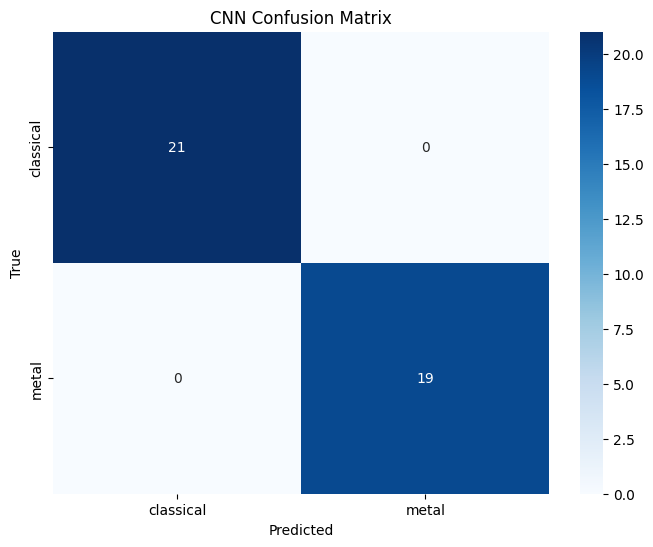

In [14]:
import seaborn as sns
# from sklearn.metrics import confusion
import numpy as NP
from sklearn.metrics import confusion_matrix

cnn_preds = np.argmax(model.predict(X_test), axis=1)
cnn_cm = confusion_matrix(y_test, cnn_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=GENRES, yticklabels=GENRES)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## 11 - Limited genres Hard (disco and pop)

In [15]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Augmentation function
def augment_image(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    return image

# Define the genres and file paths

GENRES = ['disco', 'pop']
FILE_PATH = os.path.join('Data', 'mel_spectrograms', 'mel_spectrogram_128')
X = []
y = []

GENRE_TO_INDEX = {genre: index for index, genre in enumerate(GENRES)}

# Loop through the genres and load the images with augmentation
for genre in GENRES:
    genre_dir = os.path.join(FILE_PATH, genre)
    print(f"Going through {genre}")
    for file in os.listdir(genre_dir):
        image = tf.io.read_file(os.path.join(genre_dir, file))
        image = tf.image.decode_png(image, channels=1)
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = tf.image.resize(image, [256, 256])  # Resize to 256x256
        image = augment_image(image)  # Apply augmentation
        image = image.numpy()  # Convert to numpy array
        X.append(image)
        y.append(GENRE_TO_INDEX[genre])

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Normalization

model = models.Sequential([    
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    Normalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    Normalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    Normalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    Normalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    Dropout(0.5),
    
    Dense(128, activation='relu'), 
    Dense(2, activation='softmax')
])

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32, callbacks=[reduce_lr])

evaluation = model.evaluate(X_test, y_test)
print(f"Test accuracy: {evaluation[1]:.3f}")

Going through disco
Going through pop
Epoch 1/20


/Users/conorwoollatt/.pyenv/versions/3.9.6/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 642ms/step - accuracy: 0.4881 - loss: 0.6911 - val_accuracy: 0.4750 - val_loss: 0.6970 - learning_rate: 1.0000e-04
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 711ms/step - accuracy: 0.4454 - loss: 0.7049 - val_accuracy: 0.4750 - val_loss: 0.6942 - learning_rate: 1.0000e-04
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 654ms/step - accuracy: 0.4370 - loss: 0.7027 - val_accuracy: 0.4750 - val_loss: 0.6936 - learning_rate: 1.0000e-04
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 639ms/step - accuracy: 0.4550 - loss: 0.6955 - val_accuracy: 0.4750 - val_loss: 0.6942 - learning_rate: 1.0000e-04
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 675ms/step - accuracy: 0.5396 - loss: 0.6912 - val_accuracy: 0.4750 - val_loss: 0.6926 - learning_rate: 1.0000e-04
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 649ms/step - accuracy: 0.5054 - loss: 0.6915 - val_accuracy: 0.4750 - val_loss: 0.6913 - learning_rate: 1.0000e-04
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 604ms/step - accuracy: 0.5648 - loss: 0.6862 - v

## 12 - Confusion Matrix Hard (disco and pop)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/stepWARNING:tensorflow:6 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x394065a60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


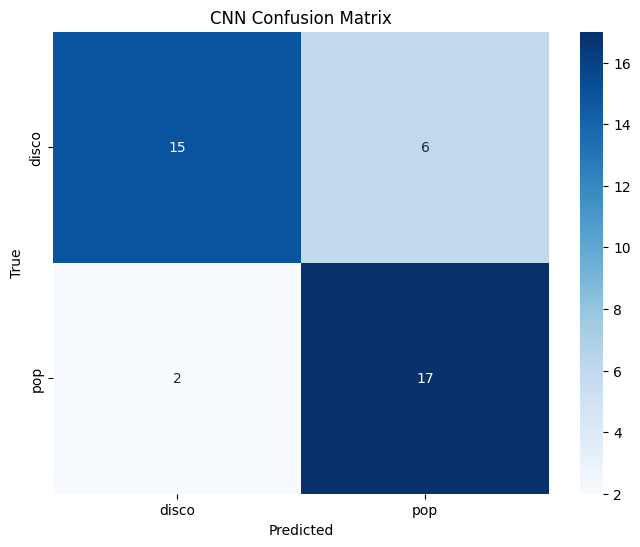

In [16]:
import seaborn as sns
# from sklearn.metrics import confusion
import numpy as NP
from sklearn.metrics import confusion_matrix

cnn_preds = np.argmax(model.predict(X_test), axis=1)
cnn_cm = confusion_matrix(y_test, cnn_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=GENRES, yticklabels=GENRES)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## 13 - Limited Genres Medium (5 random)

In [17]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random

# Augmentation function
def augment_image(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    return image

# Define the genres and file paths
GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
GENRES = random.sample(GENRES, 5)
print(GENRES)

FILE_PATH = os.path.join('Data', 'mel_spectrograms', 'mel_spectrogram_128')
X = []
y = []

GENRE_TO_INDEX = {genre: index for index, genre in enumerate(GENRES)}

# Loop through the genres and load the images with augmentation
for genre in GENRES:
    genre_dir = os.path.join(FILE_PATH, genre)
    print(f"Going through {genre}")
    for file in os.listdir(genre_dir):
        image = tf.io.read_file(os.path.join(genre_dir, file))
        image = tf.image.decode_png(image, channels=1)
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = tf.image.resize(image, [256, 256])  # Resize to 256x256
        image = augment_image(image)  # Apply augmentation
        image = image.numpy()  # Convert to numpy array
        X.append(image)
        y.append(GENRE_TO_INDEX[genre])

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Normalization

model = models.Sequential([    
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    Normalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    Normalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    Normalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    Normalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    Dropout(0.5),
    
    Dense(128, activation='relu'), 
    Dense(5, activation='softmax')
])

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32, callbacks=[reduce_lr])

evaluation = model.evaluate(X_test, y_test)
print(f"Test accuracy: {evaluation[1]:.3f}")

['hiphop', 'metal', 'jazz', 'reggae', 'classical']
Going through hiphop
Going through metal
Going through jazz
Going through reggae
Going through classical
Epoch 1/20


/Users/conorwoollatt/.pyenv/versions/3.9.6/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 579ms/step - accuracy: 0.2293 - loss: 1.6068 - val_accuracy: 0.1400 - val_loss: 1.6385 - learning_rate: 1.0000e-04
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 595ms/step - accuracy: 0.2377 - loss: 1.6122 - val_accuracy: 0.1400 - val_loss: 1.6188 - learning_rate: 1.0000e-04
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 613ms/step - accuracy: 0.2548 - loss: 1.5960 - val_accuracy: 0.1500 - val_loss: 1.6123 - learning_rate: 1.0000e-04
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 571ms/step - accuracy: 0.2926 - loss: 1.5786 - val_accuracy: 0.1800 - val_loss: 1.5740 - learning_rate: 1.0000e-04
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 585ms/step - accuracy: 0.3392 - loss: 1.5298 - val_accuracy: 0.1800 - val_loss: 1.4991 - learning_rate: 1.0000e-04
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 570ms/step - accuracy: 0.3724 - loss: 1.4260 - val_accuracy: 0.4300 - val_loss: 1.4212 - learning_rate: 1.0000e-04
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 576ms/step - accuracy: 0.3868 - lo

## 14 - Confusion Matrix Medium (5 random)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step


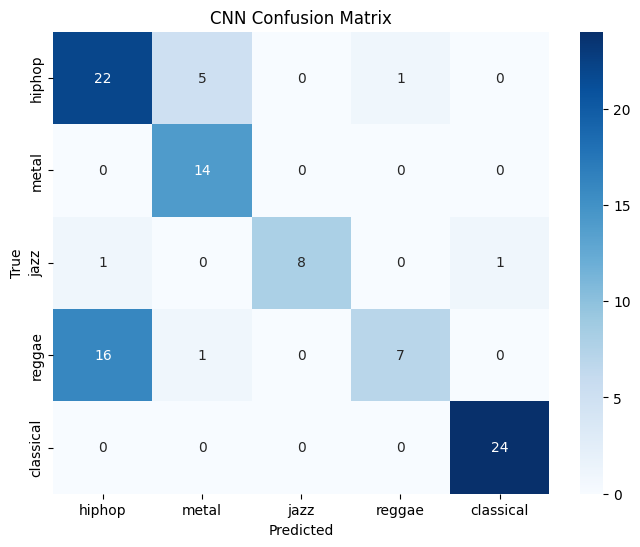

In [18]:
import seaborn as sns
# from sklearn.metrics import confusion
import numpy as NP
from sklearn.metrics import confusion_matrix

cnn_preds = np.argmax(model.predict(X_test), axis=1)
cnn_cm = confusion_matrix(y_test, cnn_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=GENRES, yticklabels=GENRES)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()